In [14]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
import seaborn as sns

/Users/asadejaz/PycharmProjects/SalesProject/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [3]:
df=pd.read_csv("retail_sales_dataset.csv")
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [8]:
df["Date"]=pd.to_datetime(df["Date"])
df["Date"].info

<bound method Series.info of 0     2023-11-24
1     2023-02-27
2     2023-01-13
3     2023-05-21
4     2023-05-06
         ...    
995   2023-05-16
996   2023-11-17
997   2023-10-29
998   2023-12-05
999   2023-04-12
Name: Date, Length: 1000, dtype: datetime64[ns]>

In [9]:
df["Gender"]=df["Gender"].replace({"Male":1,"Female":0})
df.drop(["Customer ID","Transaction ID"] , axis=1, inplace=True)
df

/var/folders/nb/y4bwpvhx7jx71j9vqp_txq040000gn/T/ipykernel_50996/1462418463.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Gender"]=df["Gender"].replace({"Male":1,"Female":0})


,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,2023-11-24,1,34,Beauty,3,50,150
1,2023-02-27,0,26,Clothing,2,500,1000
2,2023-01-13,1,50,Electronics,1,30,30
3,2023-05-21,1,37,Clothing,1,500,500
4,2023-05-06,1,30,Beauty,2,50,100
...,...,...,...,...,...,...,...
995,2023-05-16,1,62,Clothing,1,50,50
996,2023-11-17,1,52,Beauty,3,30,90
997,2023-10-29,0,23,Beauty,4,25,100
998,2023-12-05,0,36,Electronics,3,50,150


In [11]:
df=df.join(pd.get_dummies(df["Product Category"])).drop(["Product Category"], axis=1)
df

,Date,Gender,Age,Quantity,Price per Unit,Total Amount,Beauty,Clothing,Electronics
0,2023-11-24,1,34,3,50,150,True,False,False
1,2023-02-27,0,26,2,500,1000,False,True,False
2,2023-01-13,1,50,1,30,30,False,False,True
3,2023-05-21,1,37,1,500,500,False,True,False
4,2023-05-06,1,30,2,50,100,True,False,False
...,...,...,...,...,...,...,...,...,...
995,2023-05-16,1,62,1,50,50,False,True,False
996,2023-11-17,1,52,3,30,90,True,False,False
997,2023-10-29,0,23,4,25,100,True,False,False
998,2023-12-05,0,36,3,50,150,False,False,True


In [12]:
df[["Beauty", "Clothing", "Electronics"]]=df[["Beauty", "Clothing", "Electronics"]].astype(int)
df

,Date,Gender,Age,Quantity,Price per Unit,Total Amount,Beauty,Clothing,Electronics
0,2023-11-24,1,34,3,50,150,1,0,0
1,2023-02-27,0,26,2,500,1000,0,1,0
2,2023-01-13,1,50,1,30,30,0,0,1
3,2023-05-21,1,37,1,500,500,0,1,0
4,2023-05-06,1,30,2,50,100,1,0,0
...,...,...,...,...,...,...,...,...,...
995,2023-05-16,1,62,1,50,50,0,1,0
996,2023-11-17,1,52,3,30,90,1,0,0
997,2023-10-29,0,23,4,25,100,1,0,0
998,2023-12-05,0,36,3,50,150,0,0,1


<Axes: >

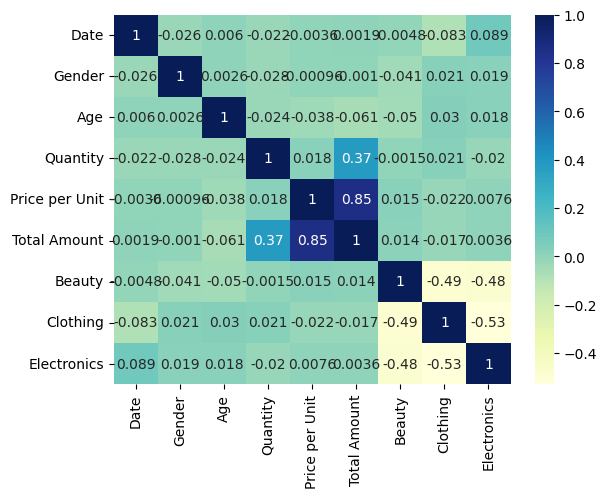

In [15]:
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

In [18]:
df1=df.rename(columns={"Date":"ds", "Total Amount":"y"})
df1

,ds,Gender,Age,Quantity,Price per Unit,y,Beauty,Clothing,Electronics
0,2023-11-24,1,34,3,50,150,1,0,0
1,2023-02-27,0,26,2,500,1000,0,1,0
2,2023-01-13,1,50,1,30,30,0,0,1
3,2023-05-21,1,37,1,500,500,0,1,0
4,2023-05-06,1,30,2,50,100,1,0,0
...,...,...,...,...,...,...,...,...,...
995,2023-05-16,1,62,1,50,50,0,1,0
996,2023-11-17,1,52,3,30,90,1,0,0
997,2023-10-29,0,23,4,25,100,1,0,0
998,2023-12-05,0,36,3,50,150,0,0,1


In [64]:
model1=Prophet()
model1.fit(df1)
future=model1.make_future_dataframe(periods=30)
forecast=model1.predict(future)
forecast

22:08:04 - cmdstanpy - INFO - Chain [1] start processing
22:08:04 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-01-01,449.756000,-280.020156,1119.270701,449.756000,449.756000,-30.573224,-30.573224,-30.573224,-30.573224,-30.573224,-30.573224,0.0,0.0,0.0,419.182776
1,2023-01-02,449.782935,-270.670617,1149.058946,449.782935,449.782935,26.050901,26.050901,26.050901,26.050901,26.050901,26.050901,0.0,0.0,0.0,475.833836
2,2023-01-03,449.809869,-303.946513,1101.852838,449.809869,449.809869,-24.279804,-24.279804,-24.279804,-24.279804,-24.279804,-24.279804,0.0,0.0,0.0,425.530066
3,2023-01-04,449.836804,-331.131636,1114.772430,449.836804,449.836804,-32.188086,-32.188086,-32.188086,-32.188086,-32.188086,-32.188086,0.0,0.0,0.0,417.648718
4,2023-01-05,449.863738,-306.832055,1170.304772,449.863738,449.863738,-17.631560,-17.631560,-17.631560,-17.631560,-17.631560,-17.631560,0.0,0.0,0.0,432.232178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,2024-01-27,460.403570,-178.882548,1239.720362,460.402839,460.404441,70.226019,70.226019,70.226019,70.226019,70.226019,70.226019,0.0,0.0,0.0,530.629590
371,2024-01-28,460.431240,-307.789793,1142.480357,460.430451,460.432150,-30.573224,-30.573224,-30.573224,-30.573224,-30.573224,-30.573224,0.0,0.0,0.0,429.858016
372,2024-01-29,460.458909,-264.701101,1208.739129,460.458065,460.459881,26.050901,26.050901,26.050901,26.050901,26.050901,26.050901,0.0,0.0,0.0,486.509810
373,2024-01-30,460.486579,-214.035670,1149.798577,460.485640,460.487630,-24.279804,-24.279804,-24.279804,-24.279804,-24.279804,-24.279804,0.0,0.0,0.0,436.206775


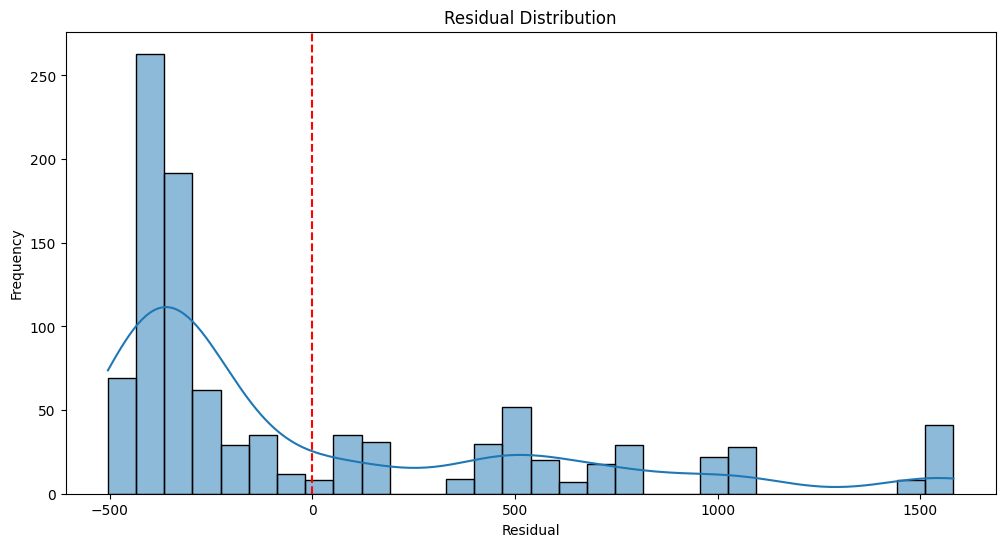

In [26]:
# Compute residuals
df_forecasted = forecast[['ds', 'yhat']].merge(df1, on='ds', how='left')
df_forecasted['residual'] = df_forecasted['y'] - df_forecasted['yhat']

# Residual plot
plt.figure(figsize=(12, 6))
sns.histplot(df_forecasted['residual'], bins=30, kde=True)
plt.axvline(0, color='red', linestyle='dashed')
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()

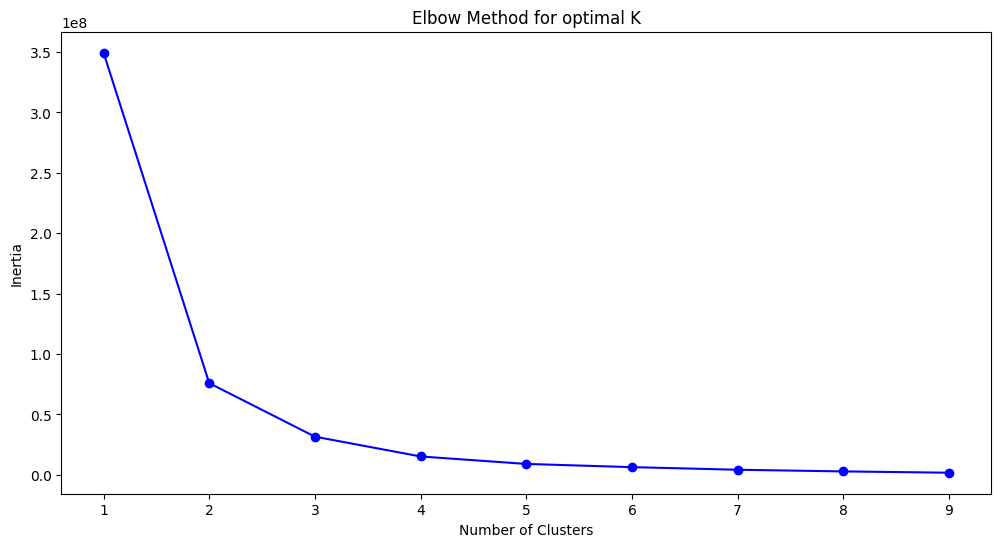

In [30]:
from sklearn.cluster import KMeans
df3=df1.drop(["ds"], axis=1)
inertia=[]
K=range(1,10)
for k in K:
    kmeans=KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df3)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(12, 6))
plt.plot(K, inertia, "bo-")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for optimal K")
plt.show()


In [62]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4, random_state=42, n_init=10)
df3["Cluster"]= kmeans.fit_predict(df3)

In [60]:
df3

,Gender,Age,Quantity,Price per Unit,y,Beauty,Clothing,Electronics,Cluster
0,1,34,3,50,150,1,0,0,0
1,0,26,2,500,1000,0,1,0,1
2,1,50,1,30,30,0,0,1,0
3,1,37,1,500,500,0,1,0,0
4,1,30,2,50,100,1,0,0,0
...,...,...,...,...,...,...,...,...,...
995,1,62,1,50,50,0,1,0,0
996,1,52,3,30,90,1,0,0,0
997,0,23,4,25,100,1,0,0,0
998,0,36,3,50,150,0,0,1,0


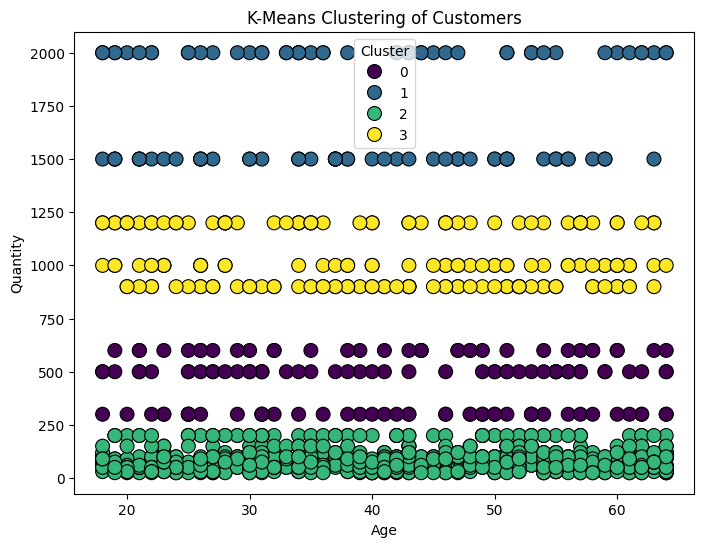

In [63]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df3, x='Age', y='y', hue='Cluster', palette='viridis', s=100, marker='o', edgecolor='black')
plt.title("K-Means Clustering of Customers")
plt.xlabel("Age")
plt.ylabel("Quantity")
plt.legend(title='Cluster')
plt.show()

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
x=df.drop(["Total Amount", "Date"], axis=1)
y=df["Total Amount"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test, y_test)

1.0

<Axes: xlabel='yhat', ylabel='Count'>

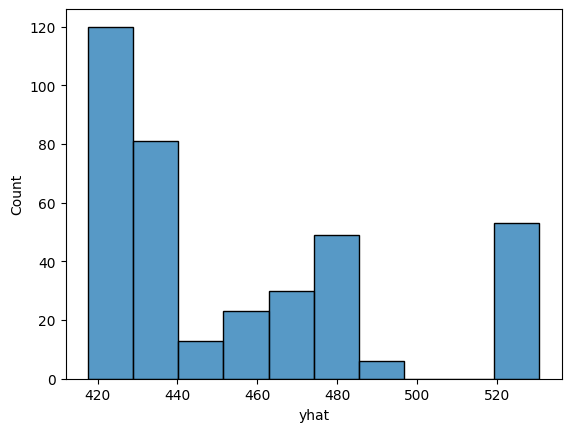

In [57]:
sns.histplot(data=forecast,x="yhat")

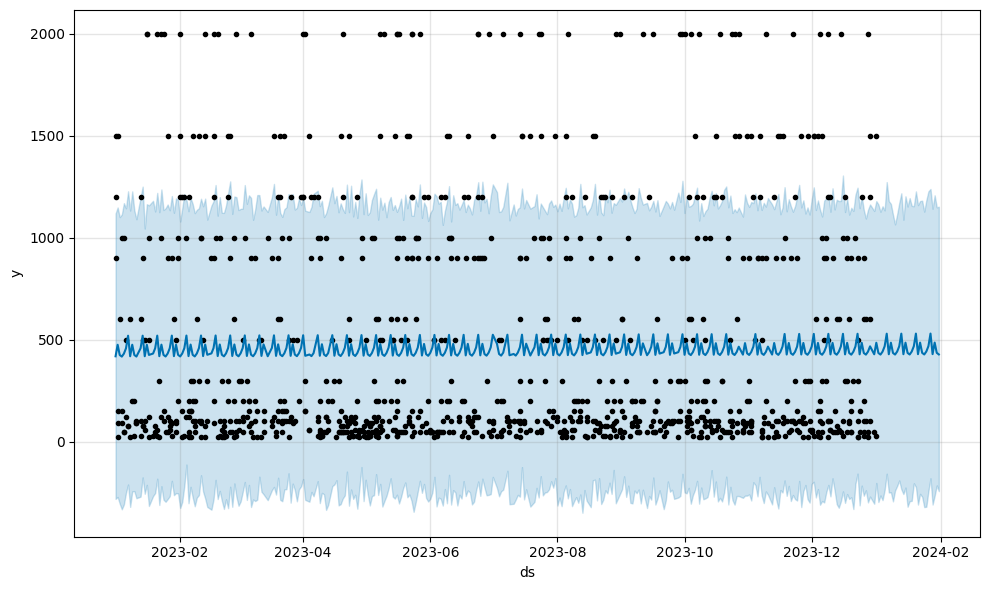

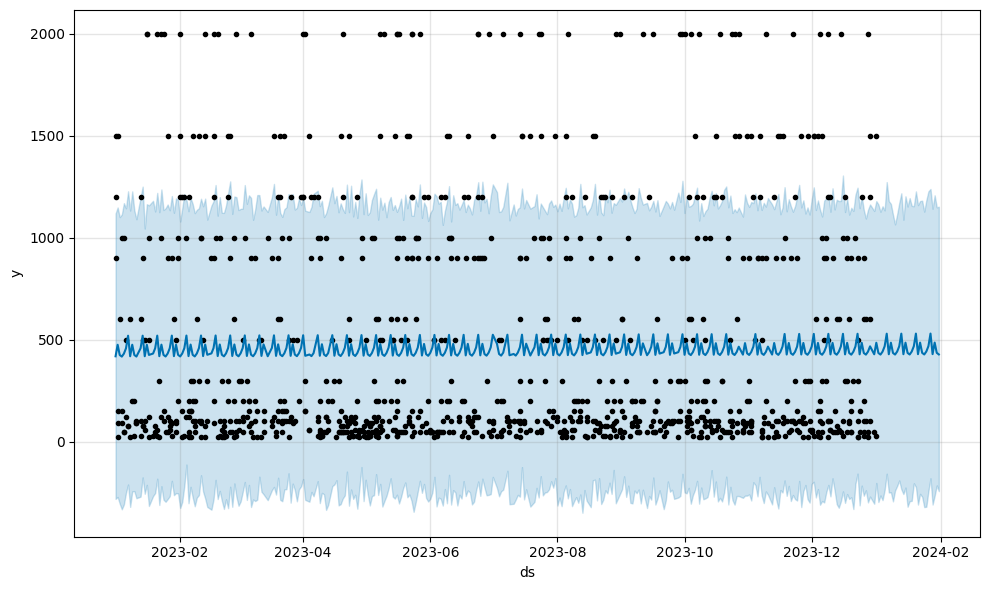

In [65]:
model1.plot(forecast)

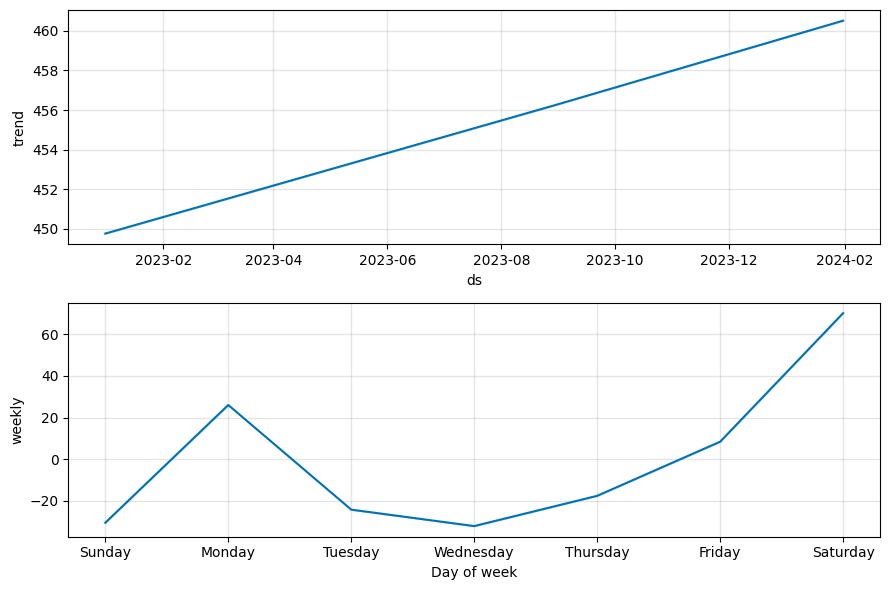

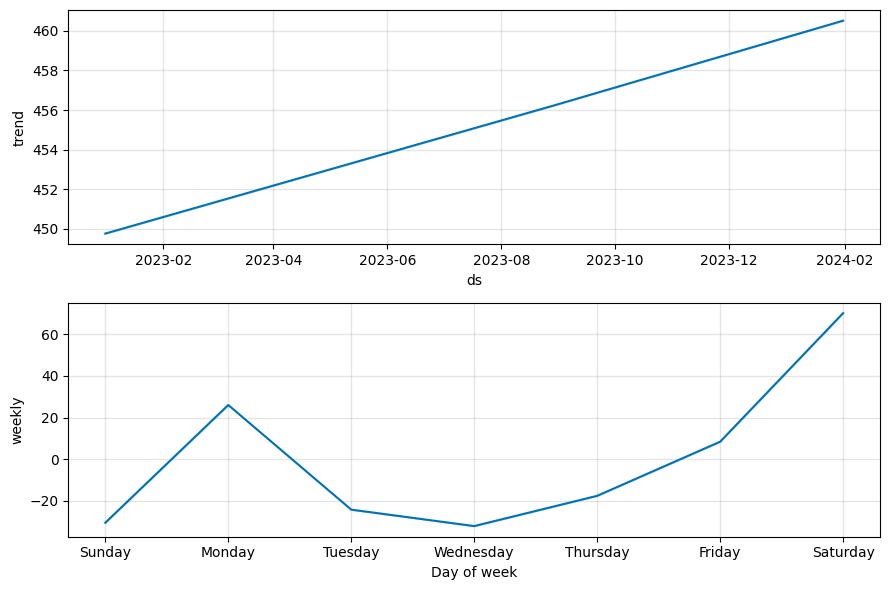

In [66]:
model1.plot_components(forecast)